In [ ]:
'''
Steps:
1. importing appropriate libraries
2. splitting the data into training and testing sets (using Wisconsin data)
3. scale/standardize the input data
4. set up neural network layers (tune parameters)
5. compile the model
6. train/fit the model
7. evaluate accuracy of the model
'''

'\nSteps:\n1. importing appropriate libraries\n2. splitting the data into training and testing sets (using Wisconsin data)\n3. scale/standardize the input data\n4. set up neural network layers (tune parameters)\n5. compile the model\n6. train/fit the model\n7. evaluate accuracy of the model\n'

In [ ]:
# Installing the Powersharp package for computing the Sharpley Value
!pip install shap
!pip install bayesopt

ERROR: Could not find a version that satisfies the requirement bayesopt (from versions: none)
ERROR: No matching distribution found for bayesopt


In [ ]:
# preprocessing here (including heat map)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
dataset = load_breast_cancer(as_frame=True)


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from keras import regularizers

In [ ]:
# Checking distribution of data
# Heat map with co-efficient values
tf.random.set_seed(50) ## Affects
x, y = dataset.data, dataset.target

df1 = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df1['target'] = y


In [ ]:
df2 = pd.DataFrame(dataset.data, columns=dataset.feature_names).to_numpy()
print(df2)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
df1['target'].value_counts()

,count
target,
1,357
0,212


In [ ]:
scalar = StandardScaler()
standardized_data = scalar.fit_transform(dataset.data)
print("Standardized Data (Z-score Normalization):")
print(standardized_data)

Standardized Data (Z-score Normalization):
[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


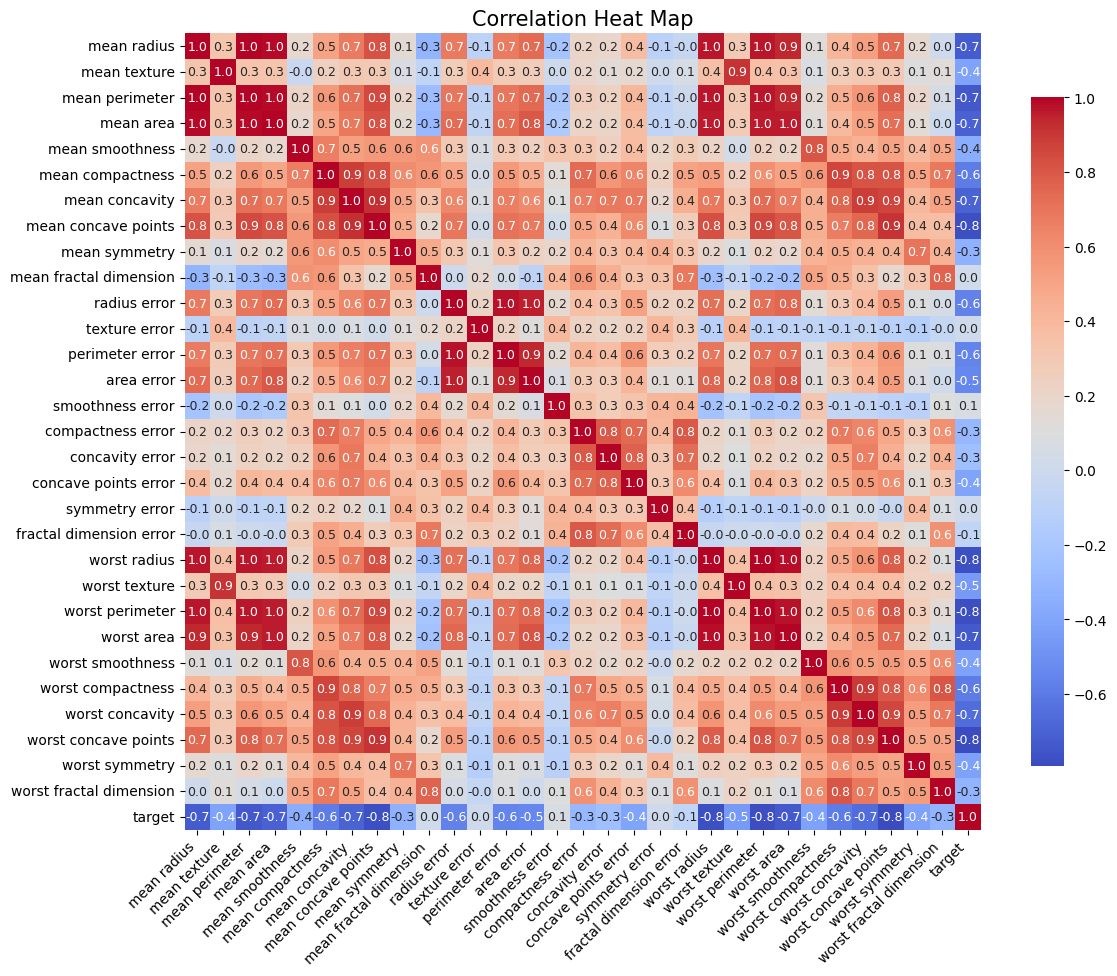

x_train shape: (455, 30)
x_test shape: (114, 30)
Accuracy: 0.956140350877193


In [ ]:
# Heat map with co-efficient values
x, y = dataset.data, dataset.target
#x, y = standardized_data, dataset.target
df = pd.DataFrame(x, columns=dataset.feature_names)
#df = pd.DataFrame(standardized_data, columns=dataset.feature_names)
df['target'] = y

# Set up the matplotlib figure size
plt.figure(figsize=(12, 10))

# Creating a heatmap with adjusted annotation size
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".1f", annot_kws={"size": 9}, square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Heat Map', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Display plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()
#split the data into testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)


## normalization for x training -> (x_train - mean(x_train)) / std(x_train)
## Also normalize test data.

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

#train decision tree classifier
clf = DecisionTreeClassifier(random_state = 123)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
dataset.frame.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
# other source: https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
# Feature selection using Pearson - https://www.kaggle.com/code/tanmayunhale/feature-selection-pearson-correlation (function)
# Steps:
# 1. Split into input (x) and output (y)
# 2. Split into training and testing
#    - Use .shape to see how the training and testing datasets are split
# 3. Configure to select features (using SelectKBest)
# 4. Fit the data (using fit on the x and y training data)
# 5. Transform test and training data (using .transform)
# 6. Print out scores for each feature
# 7. Plotting the scores using a heat map
# 8.

In [ ]:
# BUILDING THE MODEL
# source: https://www.atmosera.com/blog/binary-classification-with-neural-networks/
# https://keras.io/api/
import keras
from tensorflow.keras import Sequential
from keras import layers
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=22, activation='relu', input_dim=30, kernel_regularizer=regularizers.l1(0.01))) # input dimensions: 30; hidden layers: 22 need only input_dim for input layer
model.add(Dense(units=22, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=22, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=22, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=100)
histPred = model.predict(x_test)
print(histPred)
testLoss, testAccuracy = model.evaluate(x_test, y_test)
print(f"Accuracy of Model: {testAccuracy}")
print(f"Loss : {testLoss}")




Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6403 - loss: 4.4285 - val_accuracy: 0.6842 - val_loss: 4.3509
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7372 - loss: 4.3162 - val_accuracy: 0.7632 - val_loss: 4.2423
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8108 - loss: 4.2085 - val_accuracy: 0.8158 - val_loss: 4.1358
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8580 - loss: 4.1026 - val_accuracy: 0.8421 - val_loss: 4.0298
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8871 - loss: 3.9976 - val_accuracy: 0.8860 - val_loss: 3.9228
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9163 - loss: 3.8913 - val_accuracy: 0.9123 - val_loss: 3.8142
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9247 - loss: 3.7827 - val_accuracy: 0.9298 - val_loss: 3.7023
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9321 - loss: 3.6709 - val_accuracy: 0.9298 - val_loss:

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[9.99017417e-01]
 [9.99018252e-01]
 [1.38730239e-02]
 [9.97941494e-01]
 [7.42172077e-03]
 [9.64389563e-01]
 [9.77199256e-01]
 [9.84251857e-01]
 [9.84509289e-01]
 [8.15952063e-01]
 [9.98690903e-01]
 [8.37342814e-03]
 [3.76028870e-03]
 [9.98494625e-01]
 [1.19287139e-02]
 [9.31156933e-01]
 [9.97823596e-01]
 [9.95555222e-01]
 [9.91036832e-01]
 [9.93378043e-01]
 [3.39625054e-03]
 [1.07819244e-01]
 [9.83285725e-01]
 [9.96318936e-01]
 [9.97555375e-01]
 [5.96243376e-03]
 [1.75656639e-02]
 [9.96980727e-01]
 [2.72395127e-02]
 [9.99216378e-01]
 [7.61395991e-02]
 [9.99497473e-01]
 [9.96992290e-01]
 [9.95574355e-01]
 [1.90753043e-02]
 [9.98148441e-01]
 [9.35371876e-01]
 [9.95828211e-01]
 [9.90964055e-01]
 [7.64428498e-03]
 [5.58821820e-02]
 [9.96703327e-01]
 [4.41856980e-02]
 [9.13678825e-01]
 [1.32588875e-02]
 [9.32447076e-01]
 [3.10853799e-03]
 [3.36089614e-03]
 [4.28289741e-01]
 [9.91866086e-03]
 [1.67283267e-02]
 [2.55234772e-03]
 [8.69231641e-01]
 [9.9484

[]

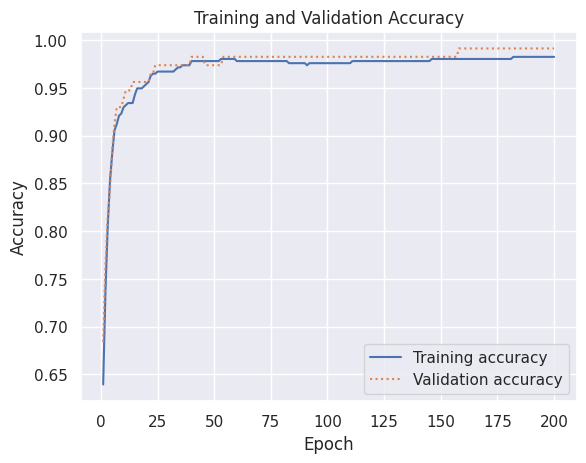

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Text(109.44999999999997, 0.5, 'Actual label')

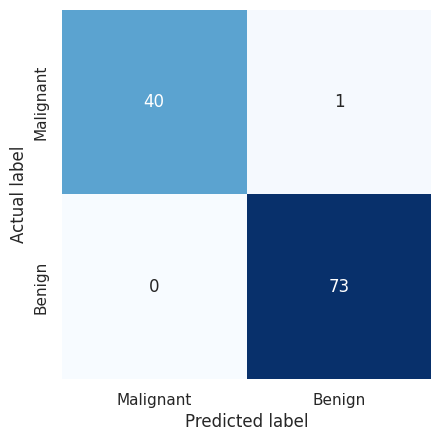

In [ ]:
# EVALUATING THE MODEL
# - Making the confusion matrix
# - Determining accuracy, precision, loss, etc.
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Malignant', 'Benign']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
# import tensorflow_datasets as tfds
# import tensorflow as tf

# def input_fn():
#   dataset_original = load_breast_cancer()
#   # split = tfds.Split.TRAIN
#   X = dataset_original.data
#   y = dataset_original.target

#   # dataset = tfds.load(dataset_original, split=split, as_supervised=True)
#   dataset = tf.data.Dataset.from_tensor_slices((X,y))
#   dataset = dataset.map(lambda features, labels: ({'dense_30_input':features}, labels))
#   dataset = dataset.batch(30).repeat()
#   return dataset

# for features_batch, labels_batch in input_fn().take(1):
#   print(features_batch)
#   print(labels_batch)

In [ ]:
# Calculating Shapley Value for feature elimination
import shap
# explainer = shap.KernelExplainer(model, x_train)
explainer = shap.KernelExplainer(model, x_train)
model_shapVals = explainer.shap_values(x_test)

  0%|          | 0/114 [00:00<?, ?it/s]

(114, 30, 1)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


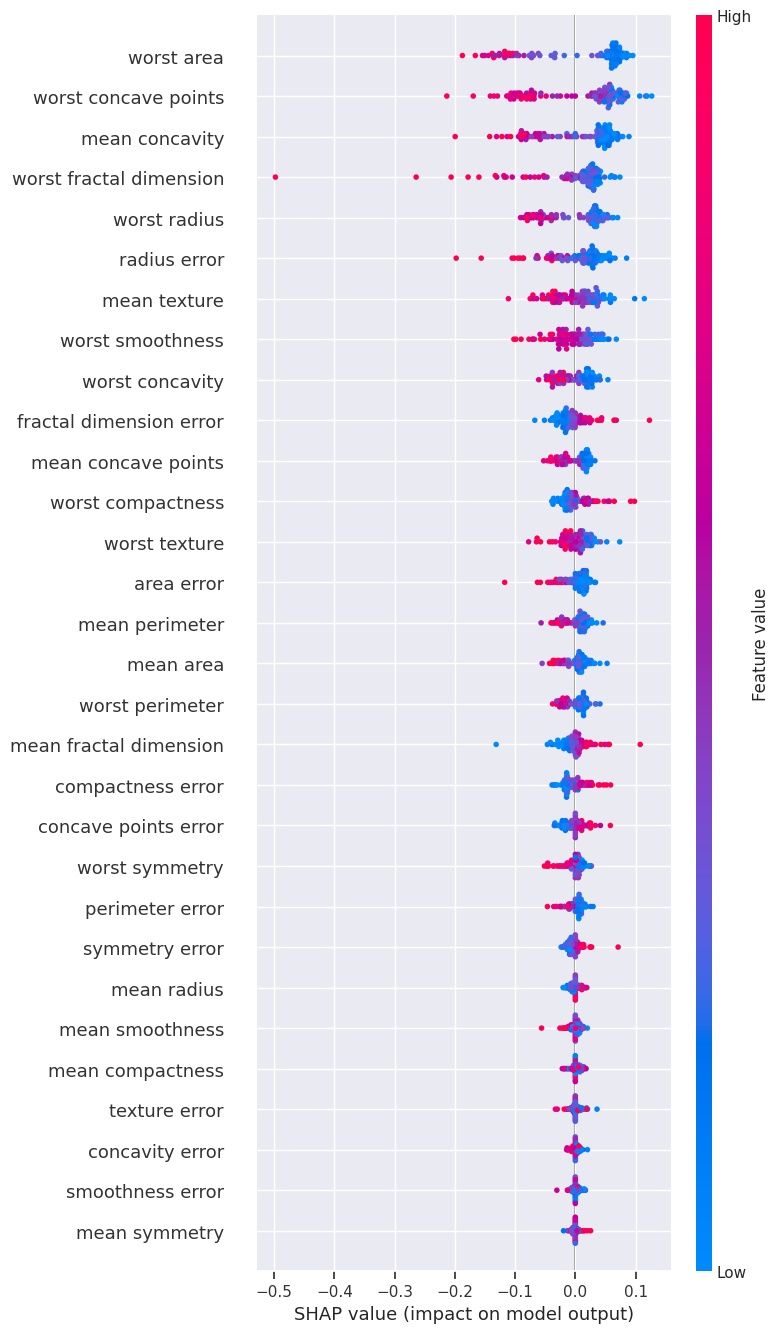

In [ ]:
print(model_shapVals.shape)
print(dataset.feature_names)
shap.summary_plot(model_shapVals[:, :, 0], x_test, feature_names=dataset.feature_names, max_display=30) ## [:, :, 0] -> only can do that since one output/class as it corresponds to the output layer being a yes or no depending on prob.
# Due to using sigmoid, only have one output being probability of yes/no

In [ ]:
meanAbsShap = np.mean(np.abs(model_shapVals[:,:, 0]), axis=0)
pdElim = pd.DataFrame( {
    'Features': dataset.feature_names,
    'Mean Shapley Values': meanAbsShap
})
pdElim

,Features,Mean Shapley Values
0,mean radius,0.006256
1,mean texture,0.030495
2,mean perimeter,0.015941
3,mean area,0.015476
4,mean smoothness,0.006012
5,mean compactness,0.005742
6,mean concavity,0.054997
7,mean concave points,0.019426
8,mean symmetry,0.003574
9,mean fractal dimension,0.014724


In [ ]:
pdElim['Order'] = pdElim['Mean Shapley Values'].rank(ascending=False)
pdElimSorted = pdElim.sort_values(by='Order', ascending=True)
top80PdElim = pdElimSorted.head(int(0.7 * len(pdElimSorted)))
top80PdElim

,Features,Mean Shapley Values,Order
23,worst area,0.076980,1.0
27,worst concave points,0.069741,2.0
6,mean concavity,0.054997,3.0
29,worst fractal dimension,0.043615,4.0
20,worst radius,0.042874,5.0
10,radius error,0.036221,6.0
1,mean texture,0.030495,7.0
24,worst smoothness,0.026022,8.0
26,worst concavity,0.021477,9.0
19,fractal dimension error,0.019561,10.0


In [ ]:

top80Vals = top80PdElim['Features'].values
xTrainNew = x_train[:, np.isin(dataset.feature_names, top80Vals)]
xTestNew = x_test[:, np.isin(dataset.feature_names, top80Vals)]
print(xTrainNew.shape[1])
print(y_train.shape)
Nmodel = Sequential()
Nmodel.add(Dense(units=22, activation='relu', input_dim=int(30*0.7), kernel_regularizer=regularizers.l1(0.01)))
Nmodel.add(Dense(units=22, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
Nmodel.add(Dense(units=22, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
Nmodel.add(Dense(units=22, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
Nmodel.add(Dense(1, activation='sigmoid'))
Nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Nmodel.fit(xTrainNew, y_train, validation_data=(xTestNew, y_test), epochs=200, batch_size=100)

NLoss, NAccuracy = Nmodel.evaluate(xTestNew, y_test)
print(f"Accuracy: {NAccuracy}")
print(f"Loss: {NLoss}")


21
(455,)
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.7784 - loss: 4.1406 - val_accuracy: 0.8158 - val_loss: 4.0478
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8510 - loss: 4.0349 - val_accuracy: 0.9035 - val_loss: 3.9429
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8595 - loss: 3.9311 - val_accuracy: 0.9035 - val_loss: 3.8385
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8855 - loss: 3.8277 - val_accuracy: 0.9123 - val_loss: 3.7351
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8847 - loss: 3.7254 - val_accuracy: 0.9298 - val_loss: 3.6322
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8926 - loss: 3.6231 - val_accuracy: 0.9298 - val_loss: 3.5296
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8974 - loss: 3.5205 - val_accuracy: 0.9298 - val_loss: 3.4268
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9095 - loss: 3.4179 - val_accuracy: 0.9386 - val_loss: 3.3245
Epoc

In [ ]:
# Calculating the F1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")


F1-Score: 0.9560187947823704


In [ ]:
# Classification
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.96      0.97      0.97        73

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")


Cross-Validation Scores: [0.9122807  0.92982456 0.92982456 0.9122807  0.89380531]
Mean CV Accuracy: 0.9156031672100605


In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
# Random Classification
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Step 5: Making predictions using the testing data

y_pred = rf_model.predict(x_test)

# Step 6: Evaluating the model

# Calculating model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


Text(109.44999999999997, 0.5, 'Actual label')

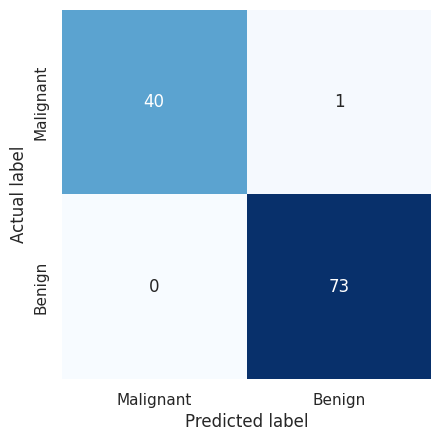

In [ ]:
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.99      1.00      0.99        73

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

F1-Score: 0.9912037589564741


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:16:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.97


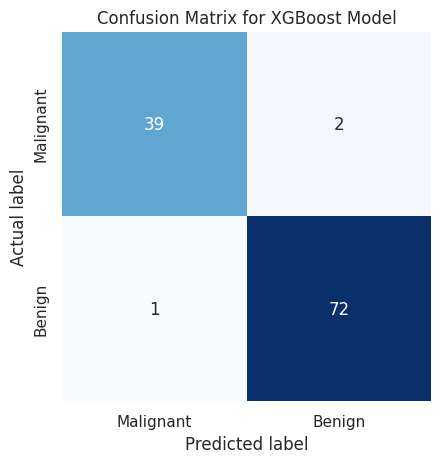

In [ ]:
#  XGBoost model Initialization
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Objective function for binary classification (logistic regression)
    eval_metric='logloss',        # Evaluation metric to monitor (logarithmic loss for binary classification)
    use_label_encoder=False,      # Disables the label encoder warning, recommended for recent XGBoost versions
    n_estimators=100,            # Number of boosting rounds (trees). Default: 100.
    learning_rate=0.1,           # Learning rate: smaller values make the model train more conservatively
    max_depth=3,                 # Maximum depth of each tree (higher depth can lead to overfitting)
    colsample_bytree=0.8,        # Subsample ratio of columns for each tree (reduces overfitting)
    subsample=0.8                # Subsample ratio of training data (reduces overfitting)
)


# Train the model
xgb_model.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
labels = ['Malignant', 'Benign']

# Visualize confusion matrix
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


In [ ]:
# Evaluating the XGboast ALgorithm
# Classification Report
print(classification_report(y_test, y_pred))
# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

# Cross Validation Score
cv_scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.99      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

F1-Score: 0.9736112768694222
Cross-Validation Scores: [0.9122807  0.92982456 0.92982456 0.9122807  0.89380531]
Mean CV Accuracy: 0.9156031672100605


In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

ModuleNotFoundError: No module named 'bayes_opt'

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

NameError: name 'make_scorer' is not defined

In [ ]:
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential','relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

In [ ]:
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_

In [ ]:
# Fitting Neural Network
def nn_cl_fun():
  nn = Sequential()
  nn.add(Dense(params_nn_['neurons'], input_dim=10, activation=params_nn_['activation']))
      if params_nn_['normalization'] > 0.5:
  nn.add(BatchNormalization())
      for i in range(params_nn_['layers1']):
  nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
      if params_nn_['dropout'] > 0.5:
  nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
      for i in range(params_nn_['layers2']):
  nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
  nn.add(Dense(1, activation='sigmoid'))
  nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
      return nn
  es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
  nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                          verbose=0)
  nn.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)